# Bulldozer Price Prediction
# Predicting 🚜 Price using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting Bulldozer Price based on their attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition
> Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

## 2.Data
>The data for this problem is split into three parts:
>* `Train.csv` is the training set, which contains data through the end of 2011.
>* `Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 2012.
>* `Test.csv` is the test set, It contains data from May 1, 2012 - November 2012.
>also you can access the data from 👉🏼 : **https://www.kaggle.com/competitions/bluebook-for-bulldozers/data**
>
>**Based on the above 👆 link, The key fields are in train.csv are:**
>* `SalesID`: the uniue identifier of the sale
>* `MachineID`: the unique identifier of a machine.  A machine can be sold multiple times
>* `saleprice`: what the machine sold for at auction (only provided in train.csv)
>* `saledate`: the date of the sale

## 3.Evaluation
>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4.Features
> There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary. check the `Data Dictionary.xlsx`

# Preparing Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [4]:
data_pd = pd.read_csv("./data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [5]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
data_pd.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [7]:
data_pd.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**one of the important field is `saledata`, let's explore it:**

In [8]:
data_pd["saledate"][:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

**should turn it to ***date type** and sort datas by date***

In [9]:
date_format_pd = data_pd.copy()

In [10]:
date_format_pd["saledate"] = pd.to_datetime(data_pd["saledate"])

In [11]:
date_format_pd["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [12]:
date_format_pd.sort_values(by="saledate", ascending=True, inplace=True)

In [13]:
date_format_pd.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### add year, month, day of the sale for each record by **pandas date format**:

In [14]:
def expand_date(data_pd, date_field_name, by="day"):
    by = str(by).lower()

    if by == "day":
        data_pd["day"] = data_pd[date_field_name].dt.day
    
    elif by == "month":
        data_pd["month"] = data_pd[date_field_name].dt.month
   
    elif by == "year":
        data_pd["year"] = data_pd[date_field_name].dt.year

In [15]:
expand_date(date_format_pd, "saledate", "day")
expand_date(date_format_pd, "saledate", "month")
expand_date(date_format_pd, "saledate", "year")

In [16]:
date_format_pd.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,day,month,year
389846,4371877,14000.0,2311876,9511,172,1.0,1997,3739.0,Low,2011-09-14,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,14,9,2011
26487,1253962,14250.0,1272308,3170,132,14.0,1987,NaN,NaN,1997-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,12,1997
108237,1439173,66000.0,205557,3807,132,1.0,1999,NaN,NaN,2005-09-27,...,NaN,NaN,NaN,NaN,NaN,Limited Slip,Conventional,27,9,2005
110038,1442932,44000.0,1097468,4328,132,2.0,1994,NaN,NaN,1998-11-21,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,21,11,1998
43639,1284580,22000.0,1506966,3178,132,1.0,1996,NaN,NaN,2003-09-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,9,2003


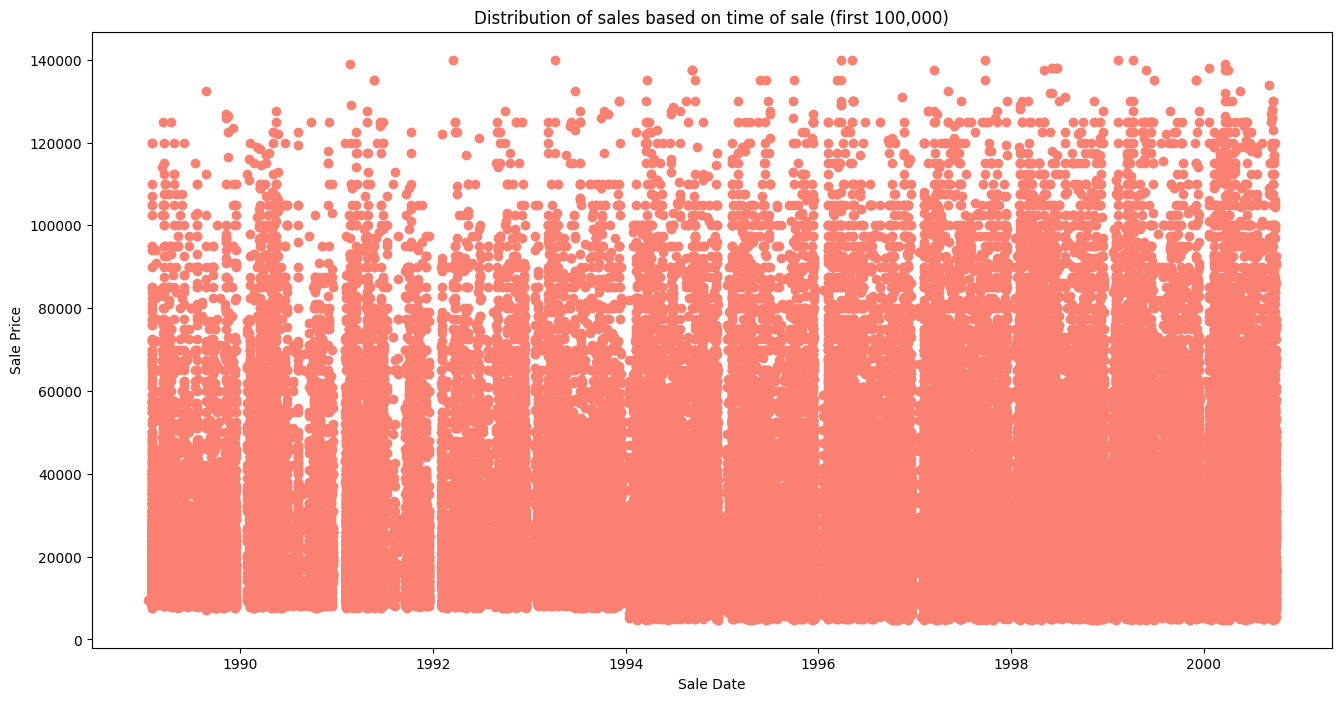

In [17]:
fig, ax = plt.subplots(figsize=(16,8))

ax = plt.scatter(date_format_pd["saledate"][:100000], date_format_pd["SalePrice"][:100000], c="salmon")

plt.xlabel("Sale Date")
plt.ylabel("Sale Price")
plt.title("Distribution of sales based on time of sale (first 100,000)")

plt.plot();

In [18]:
min_sale_price = np.min(date_format_pd["SalePrice"])
max_sale_price = np.max(date_format_pd["SalePrice"])

print(f"Min Price: {min_sale_price}, Max Price: {max_sale_price}")

Min Price: 4750.0, Max Price: 142000.0


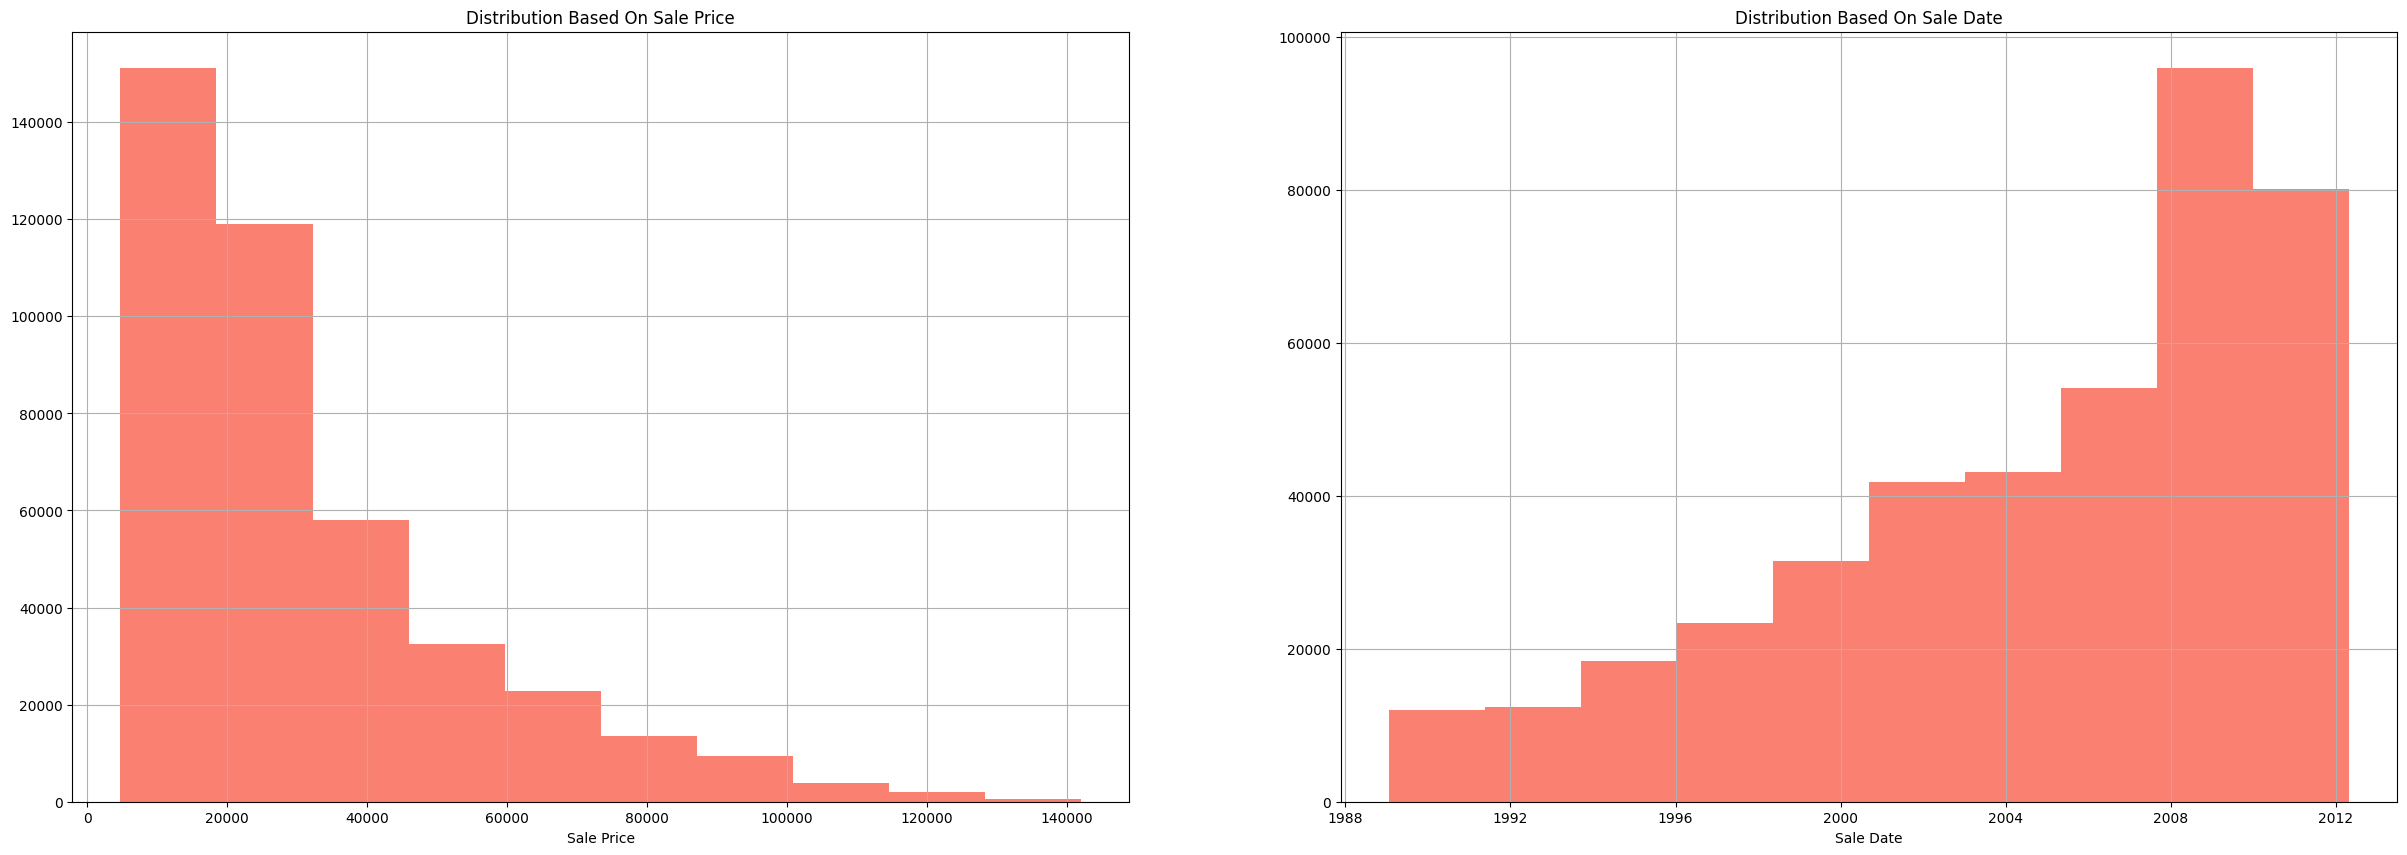

In [19]:
plt.subplot(1, 2, 1)
date_format_pd["SalePrice"].hist(color="salmon",figsize=(30,10));
plt.xlabel("Sale Price")
plt.title("Distribution Based On Sale Price");

plt.subplot(1, 2, 2)
date_format_pd["saledate"].hist(color="salmon")
plt.xlabel("Sale Date");

plt.title("Distribution Based On Sale Date");

# Preprocessing 
### let's make `imputation` and make convert all features to `numeric` type 

In [20]:
date_format_pd.drop(["saledate"], axis=1, inplace=True)

In [21]:
date_format_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [22]:
from pandas.api.types import is_numeric_dtype, is_string_dtype

## first we can change string feature to category type

In [23]:
for label, content in date_format_pd.items():
        if not is_numeric_dtype(content):
            print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
def pre_process_string_features(df):
    for label, content in df.items():
        if not is_numeric_dtype(content):
            df[label+"_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).as_ordered()
            df[label] = df[label].cat.codes+1

In [25]:
pre_process_string_features(date_format_pd)
date_format_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 99 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   SalesID                          412698 non-null  int64  
 1   SalePrice                        412698 non-null  float64
 2   MachineID                        412698 non-null  int64  
 3   ModelID                          412698 non-null  int64  
 4   datasource                       412698 non-null  int64  
 5   auctioneerID                     392562 non-null  float64
 6   YearMade                         412698 non-null  int64  
 7   MachineHoursCurrentMeter         147504 non-null  float64
 8   UsageBand                        412698 non-null  int8   
 9   fiModelDesc                      412698 non-null  int16  
 10  fiBaseModel                      412698 non-null  int16  
 11  fiSecondaryDesc                  412698 non-null  int16  
 12  fi

## second we can fill numeric feature with their `median`
**why `median`?**
  > cause `median` avoid affect of outlier

In [26]:
for label, content in date_format_pd.items():
    if is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
day
month
year
UsageBand_missing
fiModelDesc_missing
fiBaseModel_missing
fiSecondaryDesc_missing
fiModelSeries_missing
fiModelDescriptor_missing
ProductSize_missing
fiProductClassDesc_missing
state_missing
ProductGroup_missing
ProductGroupDesc_missing
Drive_System_missing
Enclosure_missing
Forks_missing
Pad_Type_missing
Ride_Control_m

In [27]:
def fill_numeric_features(df):
    for label, content in df.items():
        if is_numeric_dtype(content):
            if pd.isna(content).sum():
                df[label+"_missing"] = pd.isna(content)
                df[label] = content.fillna(content.median())

In [28]:
fill_numeric_features(date_format_pd)

In [29]:
date_format_pd.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing,auctioneerID_missing,MachineHoursCurrentMeter_missing
327936,2333349,12750.0,1703498,4663,136,2.0,1983,0.0,0,850,...,True,True,True,False,False,False,True,True,True,False
84881,1387112,25500.0,1405379,3538,132,2.0,1998,0.0,0,747,...,True,True,True,True,True,True,True,True,False,True
35079,1271094,9500.0,1132473,6633,132,1.0,1995,0.0,0,185,...,True,True,True,True,True,True,True,True,False,True
178085,1609924,26000.0,1526402,4862,132,1.0,1997,0.0,0,4574,...,True,True,True,True,True,True,False,False,False,True
253149,1769606,31000.0,1090205,2232,132,99.0,1996,966.0,2,3803,...,False,False,False,True,True,True,True,True,False,False


In [30]:
date_format_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 101 entries, SalesID to MachineHoursCurrentMeter_missing
dtypes: bool(46), float64(3), int16(4), int32(3), int64(5), int8(40)
memory usage: 70.1 MB


In [31]:
date_format_pd.isna().sum()

SalesID                             0
SalePrice                           0
MachineID                           0
ModelID                             0
datasource                          0
                                   ..
Travel_Controls_missing             0
Differential_Type_missing           0
Steering_Controls_missing           0
auctioneerID_missing                0
MachineHoursCurrentMeter_missing    0
Length: 101, dtype: int64

# a little conclusion :
**now we have a preprocessed data, all of our data:**
* have a value
* have a numeric type

**let's save this data frame**

In [32]:
date_format_pd.to_csv("data/bluebook-for-bulldozers/pure_train_valid_data.csv", index=False)

In [2]:
pure_pd = pd.read_csv("data/bluebook-for-bulldozers/pure_train_valid_data.csv", low_memory=False)

In [3]:
pure_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 101 entries, SalesID to MachineHoursCurrentMeter_missing
dtypes: bool(46), float64(3), int64(52)
memory usage: 191.3 MB


## Cause we have lots of fields, it is better to continue **EDA** in `Model-Driven-Design`

# Modeling
based on the **https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html** , we can choose our model, i want to use `Ensemble Regression`, Because it is **efficient** in any case and also it match with our needs for this problem

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [5]:
len(pure_pd)

412698

In [6]:
pure_pd.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc',
       ...
       'Thumb_missing', 'Pattern_Changer_missing', 'Grouser_Type_missing',
       'Backhoe_Mounting_missing', 'Blade_Type_missing',
       'Travel_Controls_missing', 'Differential_Type_missing',
       'Steering_Controls_missing', 'auctioneerID_missing',
       'MachineHoursCurrentMeter_missing'],
      dtype='object', length=101)

In [7]:
X = pure_pd.drop("SalePrice", axis=1)
y = pure_pd["SalePrice"]

### we can split `412698` data to **train** & **validation** datas

## 2.Data
>The data for this problem is split into three parts:
>* `Train.csv` is the training set, which contains data through the end of 2011.
>* `Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 2012.
>* `Test.csv` is the test set, It contains data from May 1, 2012 - November 2012.
>also you can access the data from 👉🏼 : **https://www.kaggle.com/competitions/bluebook-for-bulldozers/data**

we can using **train_test_split** to achieve that, but the thing is, based on **above👆** info, we can do this process by hand

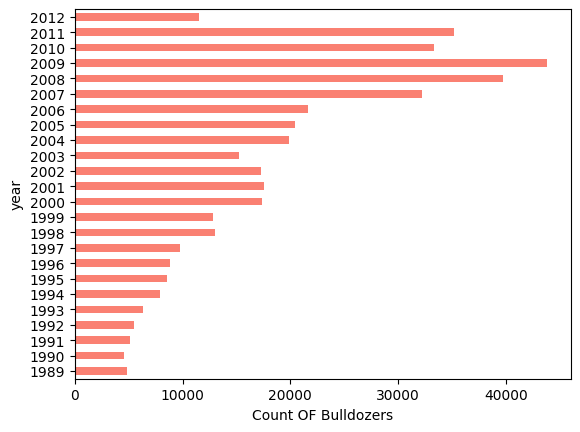

In [8]:
pure_pd["year"].value_counts().sort_index().plot(kind="barh", color="salmon");
plt.xlabel("Count OF Bulldozers");

In [9]:
train_pd = pure_pd[pure_pd.year <= 2011]
valid_pd = pure_pd[pure_pd.year > 2011]

In [10]:
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = train_pd.drop("SalePrice", axis=1)
X_valid = valid_pd.drop("SalePrice", axis=1)
y_train = train_pd["SalePrice"]
y_valid = valid_pd["SalePrice"]

print(f"Train Data: {len(train_pd)} => X : {len(X_train)}, y: {len(y_train)}")
print(f"Valid Data: {len(valid_pd)} => X : {len(X_valid)}, y: {len(y_valid)}")

Train Data: 401125 => X : 401125, y: 401125
Valid Data: 11573 => X : 11573, y: 11573


**Fitting The Model**

In [40]:
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

**let's make a general validation function for our problem**

## Evaluation
>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

In [12]:
def evaluate(the_model):
    """
    this func gives model as an parameter
    & evaluates on that
    """
    y_train_preds = the_model.predict(X_train)
    y_valid_preds = the_model.predict(X_valid)

    train_r2 = r2_score(y_train, y_train_preds)
    valid_r2 = r2_score(y_valid, y_valid_preds)

    train_mae = mean_absolute_error(y_train, y_train_preds)
    valid_mae = mean_absolute_error(y_valid, y_valid_preds)

    train_msle = mean_squared_log_error(y_train, y_train_preds)
    valid_msle = mean_squared_log_error(y_valid, y_valid_preds)
    
    train_rmsle = np.sqrt(train_msle)
    valid_rmsle = np.sqrt(valid_msle)

    print(f"Train MAE: {train_mae}\nValid MAE: {valid_mae}")
    print(f"Train RMSLE: {train_rmsle}\nValid RMSLE: {valid_rmsle}")
    print(f"Train R2: {train_r2}\nValid_R2: {valid_r2}")

    return {
        "Train": {
            "MAE" : train_mae,
            "RMSLE" : train_rmsle,
            "R2" : train_r2
        },

        "Valid": {
            "MAE" : valid_mae,
            "RMSLE" : valid_rmsle,
            "R2" : valid_r2
        }
    }

In [41]:
normal_model_scores = evaluate(model)

Train MAE: 1583.250101090682
Valid MAE: 6093.99870387972
Train RMSLE: 0.08433503824950477
Valid RMSLE: 0.25355992405786376
Train R2: 0.9874743400311754
Valid_R2: 0.873335811909276


## Such WOW!
Our `model` performed well, But what if we tune it and make it as good as we can.

there's a thing, **process time is a little bit annoying**, what if we use **part of our train data not all of it**

In [42]:
little_model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
little_model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [43]:
little_model_scores = evaluate(little_model)

Train MAE: 5530.532661988156
Valid MAE: 7084.742282035772
Train RMSLE: 0.2565009178845695
Valid RMSLE: 0.28943462524665087
Train R2: 0.8620106147235636
Valid_R2: 0.834805362161608


In [44]:
normal_model_pd = pd.DataFrame(normal_model_scores).T
little_model_pd = pd.DataFrame(little_model_scores).T

In [45]:
normal_model_pd

,MAE,RMSLE,R2
Train,1583.250101,0.084335,0.987474
Valid,6093.998704,0.253560,0.873336


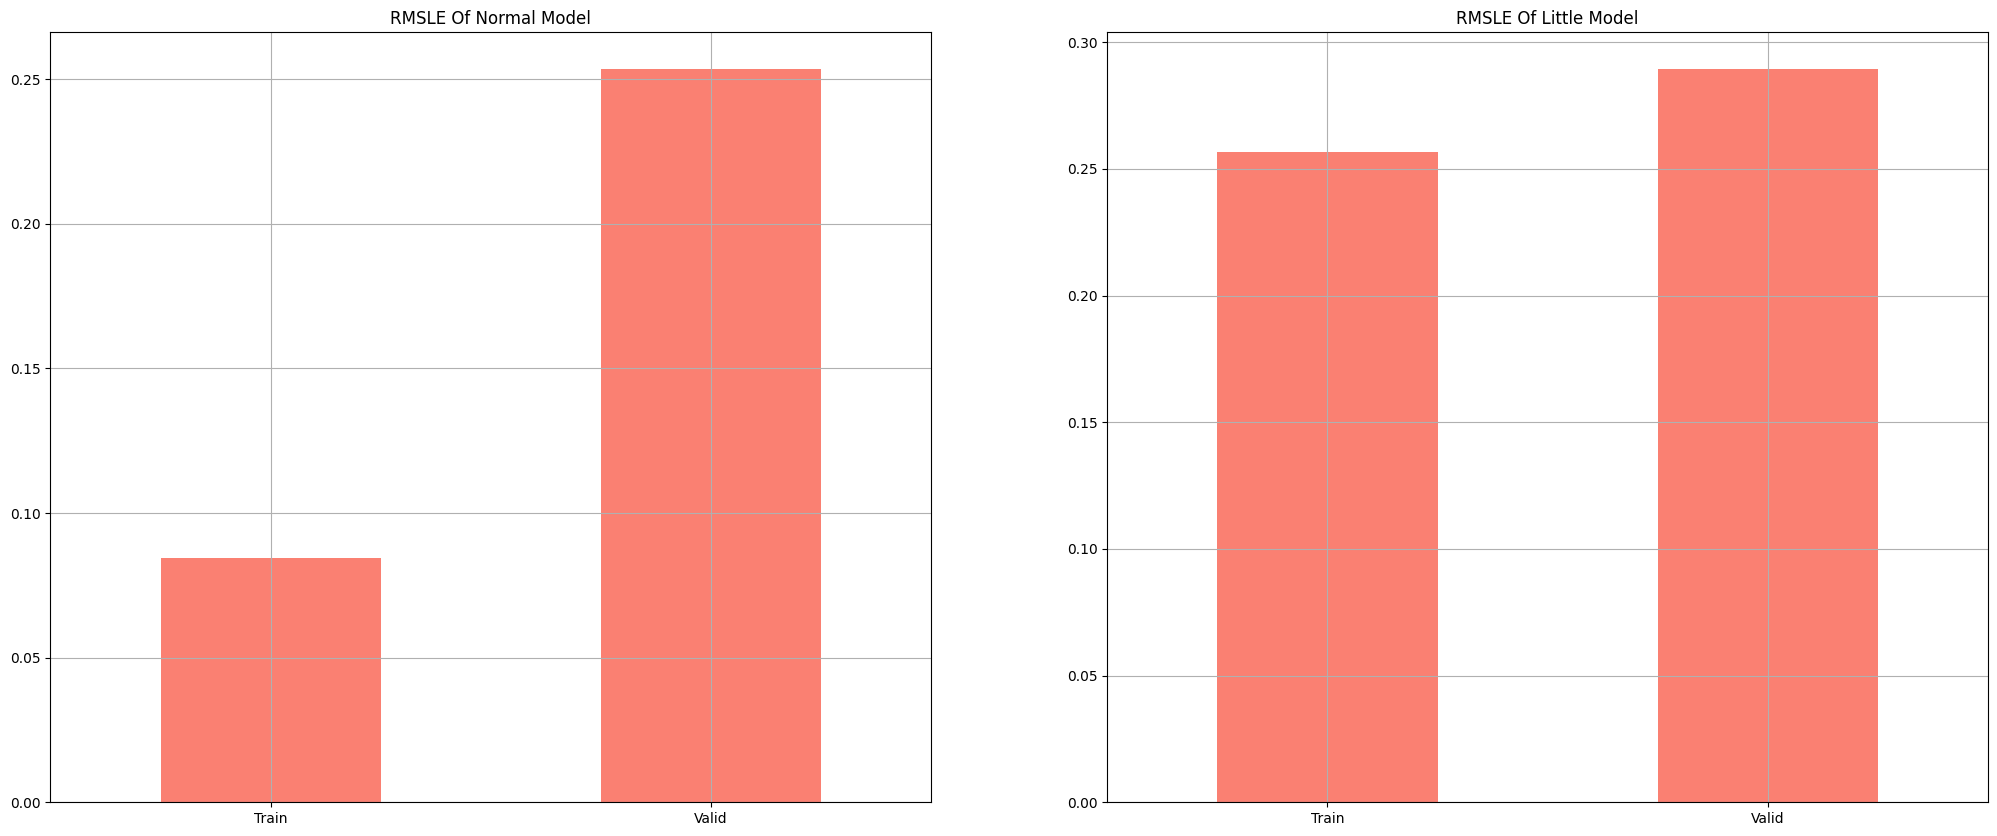

In [46]:
plt.subplot(1, 2, 1)
normal_model_pd["RMSLE"].plot(kind="bar",color="salmon",figsize=(25,10));

plt.grid()
plt.xticks(rotation=0)
plt.title("RMSLE Of Normal Model");

plt.subplot(1, 2, 2)
little_model_pd["RMSLE"].plot(kind="bar" ,color="salmon")

plt.grid()
plt.xticks(rotation=0)
plt.title("RMSLE Of Little Model");

it's make sense , since we used **part of our train data**, its **power on predicting** train data is worse in little model.
### from now, we continue with little one

In [15]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {
        'n_estimators': [40, 100, 200],
        'max_features': [0.5],
        'max_depth': [None, 10, 20, 30],
        'min_samples_leaf': [1, 3, 4],
        'max_samples' : [10000]
}

rf = RandomForestRegressor(n_jobs=-1, random_state=42)

tune_model = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
tune_model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, n_estimators=100; total time=  16.0s
[CV] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=3, n_estimators=100; total time=  13.1s
[CV] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=4, n_estimators=40; total time=   5.6s
[CV] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=4, n_estimators=100; total time=  12.2s
[CV] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=1, n_estimators=100; total time=  10.9s
[CV] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=1, n_estimators=200; total time=  19.5s
[CV] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=4, n_estimators=200; total time=  21.2s
[CV] END max_depth=20, max_features=0.5, max_samples=10000, min_samples_leaf=1, n_estimators=200; total time=  3

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30], 'max_features': [0.5],
                         'max_samples': [10000], 'min_samples_leaf': [1, 3, 4],
                         'n_estimators': [40, 100, 200]},
             verbose=2)

In [18]:
tune_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 10000,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [19]:
tune_model_scores = evaluate(tune_model)

Train MAE: 5658.725911274542
Valid MAE: 7043.3842244880325
Train RMSLE: 0.2611350874610351
Valid RMSLE: 0.29095344530160355
Train R2: 0.8580081972293169
Valid_R2: 0.8402686217822186


In [38]:
tune_model_pd = pd.DataFrame(tune_model_scores).T

**what if we use best params on whole train set? 😋**

## Tuning Random Forest Regressor For All Of The Train Set

In [35]:
final_model = RandomForestRegressor(n_estimators=200, max_depth=None, max_features=0.5, min_samples_leaf=1, n_jobs=-1,random_state=42)

final_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [36]:
final_model_scores = evaluate(final_model)

Train MAE: 1553.0338982819155
Valid MAE: 5859.3952328696105
Train RMSLE: 0.08239000747863359
Valid RMSLE: 0.2417126581048283
Train R2: 0.9882610182147202
Valid_R2: 0.884874445056033


## Yeap 😁

our `final model` has been fitted with all train set and has the best result amoung the `normal model` & `little model`.
we collect the **hyper parameter** with tuning `little model` (*Grid Search CV*), then used those **HPs** to tune the `normal model`

In [37]:
final_model_pd = pd.DataFrame(final_model_scores).T

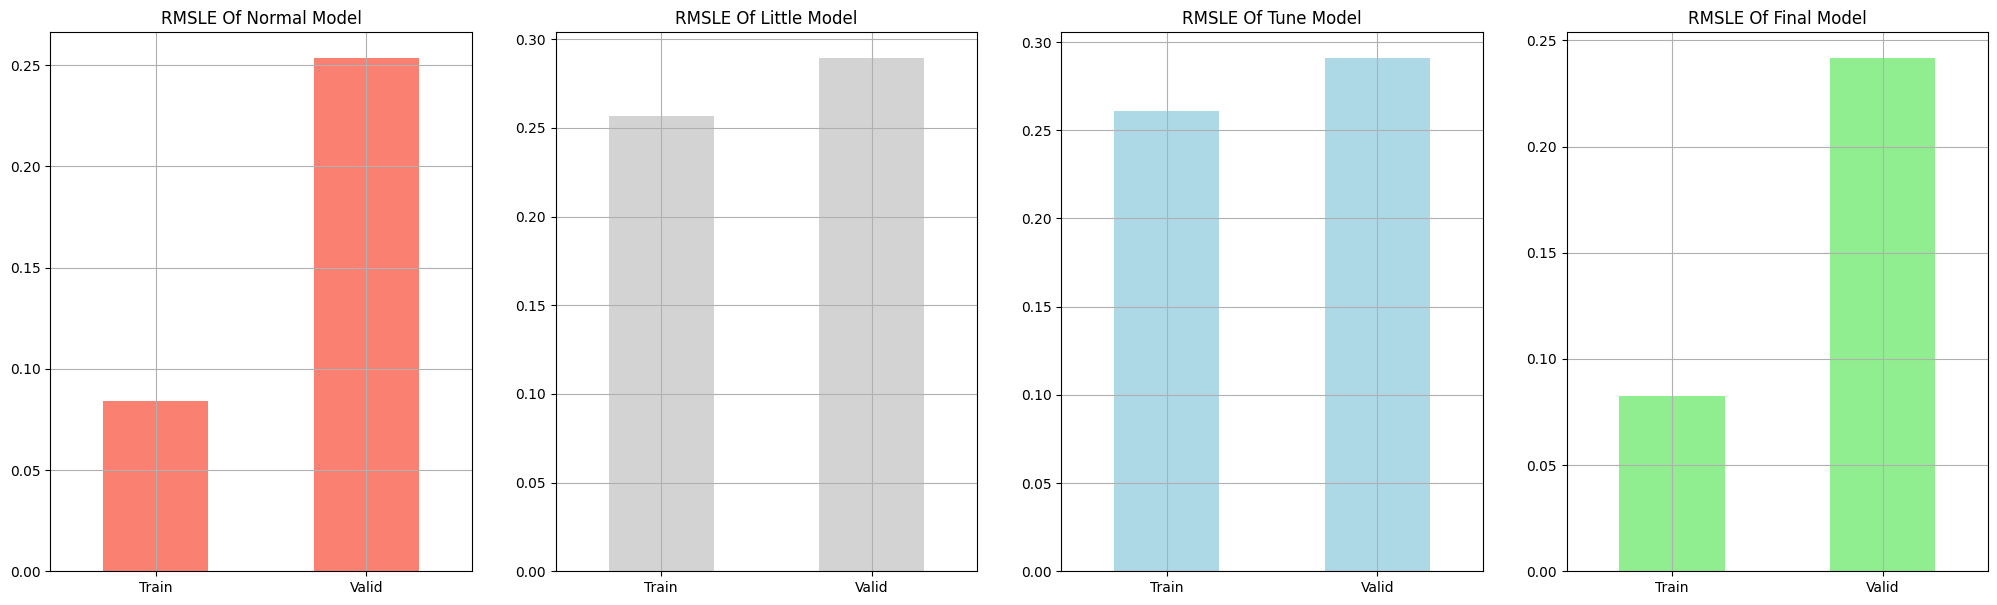

In [58]:
plt.subplot(1, 4, 1)
normal_model_pd["RMSLE"].plot(kind="bar",color="salmon",figsize=(25,7));

plt.grid()
plt.xticks(rotation=0)
plt.title("RMSLE Of Normal Model");

plt.subplot(1, 4, 2)
little_model_pd["RMSLE"].plot(kind="bar" ,color="lightgray")

plt.grid()
plt.xticks(rotation=0)
plt.title("RMSLE Of Little Model");

plt.subplot(1, 4, 3)
tune_model_pd["RMSLE"].plot(kind="bar" ,color="lightblue")

plt.grid()
plt.xticks(rotation=0)
plt.title("RMSLE Of Tune Model");

plt.subplot(1, 4, 4)
final_model_pd["RMSLE"].plot(kind="bar" ,color="lightgreen")

plt.grid()
plt.xticks(rotation=0)
plt.title("RMSLE Of Final Model");